## Лабораторная работа 3: Word Embeddings

Эта лабораторная работа посвящена Word Embeddings и различными развесёлыми манипуляциями с ними. Мы будем преобразовывать слова в плотные вектора с помощью двух алгоритмов Word2Vec: cbow и skipgram. Воспользуемся готовым решением, а именно библиотекой gensim. Полную документацию библиотеки можно почитать здесь: https://radimrehurek.com/gensim/apiref.html.

Но для начала подготовим данные. В gensim есть несколько встроенных датасетов, один из них -- text8. Этот датасет содержит выдержки из англоязычной википедии примерно на 32мб. Это немного, но чтобы поиграться сойдёт.

Давайте загрузим этот датасет. Он представляет из себя список списков слов.

In [5]:
import gensim.downloader as api

dataset = api.load("text8") 
data = [d for d in dataset]
data[50][:10]

['many',
 'exist',
 'these',
 'choices',
 'give',
 'us',
 'alternative',
 'forms',
 'of',
 'geometry']

Теперь давайте обучим модель w2v, использующую алгоритм cbow. Для этого воспользуемся классом Word2Vec из библиотеки gensim.

In [6]:
from gensim.models import Word2Vec
bow_model = Word2Vec(data,               # датасет
                     window=10,          # ширина контекстного окна
                     size=32,            # размерность векторов-эмбеддингов
                     sg=0,               # флаг, определяющий пользуемый алгоритм; 0 -- cbow, 1 -- skipgram
                     min_count=2).wv     # минимальное количество вхождений слова в датасет, необходимое для попадания в словарь

После того, как модель обучилась, мы можем всячески манипулировать полученными векторами. Например векторное представление слов можно получить так:

In [7]:
bow_model['punk']

array([-4.18334   ,  1.6653636 , -0.67615545, -5.3074    ,  0.6508969 ,
        2.8934584 , -1.0492567 ,  3.5712833 , -1.8720181 , -2.3420165 ,
       -3.2996986 ,  1.923254  ,  0.76275057, -2.397155  ,  1.4706821 ,
        2.600849  ,  2.6887794 ,  0.77875763,  0.3215712 , -0.48720577,
       -0.71984595, -1.8896043 ,  0.42750752,  0.21692161, -1.3344159 ,
       -1.8368846 , -1.7781128 ,  1.5011421 , -3.1450498 ,  1.8289454 ,
        3.077933  ,  0.59461695], dtype=float32)

...а еще можно получить список наиболее похожих слов...

In [8]:
bow_model.most_similar('anxiety')

[('disorder', 0.9229644536972046),
 ('chronic', 0.9103493690490723),
 ('psychosis', 0.9103192090988159),
 ('recurrent', 0.906618595123291),
 ('schizophrenia', 0.9037907719612122),
 ('neurological', 0.9034107327461243),
 ('symptoms', 0.9015408158302307),
 ('psychomotor', 0.9004547595977783),
 ('sufferers', 0.895108699798584),
 ('phobias', 0.8924500346183777)]

...а еще эти вектора можно складывать и вычитать друг из друга (см. лекцию). Метод $\textit{most_similar}$ принимает два списка слов: positive (которые он складывает) и negative (которые вычитает). Это позволяет получить некоторую аналогию переноса знаний. Самый известный пример: при сложении векторов 'king' и 'woman' и вычитании вектора 'man' должно получиться нечто, близкое к вектору 'queen'. По смыслу это можно интерпретировать так: "как король, только женщина, а не мужчина". 

Давайте узнаем, кого наша модель считает русским Мао Дзе Дуном.

In [9]:
bow_model.most_similar(positive=['mao', 'russia'], negative=['china'])

[('stalin', 0.8409664630889893),
 ('mussolini', 0.7955460548400879),
 ('daoud', 0.7859640121459961),
 ('mikhail', 0.7716144323348999),
 ('nikita', 0.7647908926010132),
 ('kerensky', 0.7512561082839966),
 ('purge', 0.7500793933868408),
 ('gorbachev', 0.7495396733283997),
 ('lenin', 0.749329686164856),
 ('khrushchev', 0.7488452792167664)]

$\textbf{Задание.}$ По аналогии постройте и обучите Word2Vec модель, использующую алгоритм skipgram. Изучив особенности алгоритма определите как именно нужно изменить параметры модели по сравнению с алгоритмом cbow (что увеличить, что уменьшить). Размерность векторов-эмбеддингов должна быть равна 32.

In [77]:
#TODO: YOUR CODE HERE

sg_model = Word2Vec(data,               # датасет
                     window=20,          # ширина контекстного окна
                     size=32,            # размерность векторов-эмбеддингов
                     sg=1,               # флаг, определяющий пользуемый алгоритм; 0 -- cbow, 1 -- skipgram
                     min_count=1).wv     # минимальное количество вхождений слова в датасет, необходимое для попадания в словарь

$\textbf{Задание.}$ Придумайте свой пример на сложение и вычитание векторов.

$\textit{NB.}$ Как уже было отмечено, text8 является сравнительно небольшим датасетом, а размерность 32 является весьма скромной для векторов-эмбеддингов (стандартным значением является 300). Оба этих факта отрицательно влияют на качество эмбеддингов. Поэтому если результат вычисления не соответствует вашим ожиданием, то это может быть связано не только с плохой настройкой вашей модели, но и с низкой встречаемостью выбранных вами слов. Попробуйте разные примеры на сложение и поэкспереминтируйте с настройками параметров модели.


In [97]:
#TODO: YOUR CODE HERE
sg_model.most_similar(positive=['mao', 'russia'], negative=['china'])

[('stalin', 0.8608579635620117),
 ('lenin', 0.856766402721405),
 ('mikhail', 0.8500192761421204),
 ('bolsheviks', 0.8488622903823853),
 ('kamenev', 0.8417930603027344),
 ('bolshevik', 0.8318971395492554),
 ('trotsky', 0.8266617059707642),
 ('gorbachev', 0.8262181282043457),
 ('mensheviks', 0.8164330124855042),
 ('bolshevism', 0.8012571930885315)]

In [98]:
sg_model.most_similar(positive=['stalin', 'china'], negative=['russia'])

[('zedong', 0.8817853927612305),
 ('mao', 0.8713707327842712),
 ('chiang', 0.8643786311149597),
 ('kuomintang', 0.8550167083740234),
 ('maoist', 0.8415520191192627),
 ('shek', 0.8360311985015869),
 ('deng', 0.831993579864502),
 ('kmt', 0.8244394659996033),
 ('xiaoping', 0.8062924146652222),
 ('kampuchea', 0.8016543388366699)]

In [95]:
sg_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('prince', 0.8453209400177002),
 ('naruhito', 0.844243049621582),
 ('empress', 0.8420677185058594),
 ('regnant', 0.840962827205658),
 ('princess', 0.8312573432922363),
 ('eldest', 0.8292691707611084),
 ('regent', 0.8238272666931152),
 ('yolande', 0.822325587272644),
 ('gemmei', 0.8208581209182739),
 ('queen', 0.8191739320755005)]

In [96]:
sg_model.most_similar(positive=['queen', 'man'], negative=['woman'])

[('king', 0.871336817741394),
 ('lord', 0.8640255928039551),
 ('protector', 0.8297043442726135),
 ('homage', 0.822144091129303),
 ('arthur', 0.807533860206604),
 ('fortinbras', 0.8047175407409668),
 ('fealty', 0.8029298186302185),
 ('melchett', 0.7986611723899841),
 ('sir', 0.7961955666542053),
 ('carisbrooke', 0.7889457941055298)]

Давайте визуализируем построенные вашей моделью эмбеддинги. Будем передавать значения компонент как цвета.

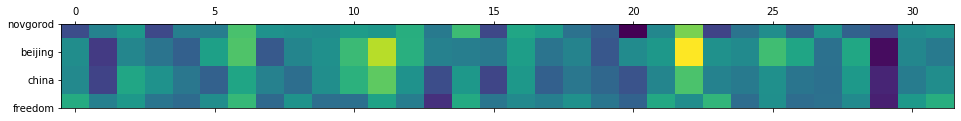

In [99]:
import matplotlib.pyplot as plt
import numpy as np

words_to_show=['novgorod', 'beijing', 'china', 'freedom']

nrows = len(words_to_show)
ncols = 32

image = np.zeros([nrows, ncols]) 
for i in range(nrows):
    word = words_to_show[i]
    image[i]=sg_model[word]
    
plt.matshow(image) 
plt.yticks(range(nrows), words_to_show) 
plt.show() 

$\textbf{Задание.}$ Порефлексируйте над полученной выше картинкой. Подумайте над тем, какие пары векторов должны быть больше визуально похожи друг на друга, а какие меньше, и соответствует ли результат действительности. 

$\textbf{Задание.}$ Реализуйте функцию скалярного произведения векторов и с помощью неё оцените, какая пара векторов похожа друг на друга сильнее -- novgorod и beijing или china и freedom?

In [112]:
def scalar(a,b):
    a = a / np.linalg.norm(a)
    b = b / np.linalg.norm(b)
    return sum(i * j for i, j in zip(a,b))    

In [113]:
scalar(sg_model['novgorod'],sg_model['beijing'])

0.41895289547392167

In [114]:
scalar(sg_model['china'], sg_model['freedom'])

0.5781726387795061

#### Проекция на плоскость: PCA

32-мерные вектора -- это, конечно, здорово, но картинка выше не слишком уж информативна. Было бы очень интересно посмотреть на эти вектора в пространстве и оценить как они группируются в кластеры. Но мы, люди, привыкли смотреть на 2-х и 3-х мерные вектора (ну или точки), в то время как наши эмбеддинги состоят из 32-х размерностей... Хорошая новость! Существуют алгоритмы понижения размерности.

Самым простым из них является алгоритм PCA (Principal Component Analysis -- Метод Главных Компонент).

В геометрическом смысле, PCA пытается найти такие оси, вдоль которых происходит наибольшая часть разброса значений. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">

В алгебраическом смысле, PCA пытается разложить матрицу $X$, содержащую вектора, на две матрицы меньшего размера: $W$ и $\hat W$ так, чтобы минимизировать среднее квадратичное отклонение:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - матрица объектов;
- $W \in \mathbb{R}^{m \times d}$ - матрица прямого преобразования;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - матрица обратного преобразования;
- $n$ -- число объектов, $m$ -- исходная размерность $d$ -- итоговая размерность;



Давайте выберем 12 слов, с помощью вашей модели получим эмбеддинги и попытаемся визуализировать их на плоскости. Пусть 4 слова соответствуют условной теме 'мировые лидеры', ещё 4 -- теме 'растительность', а оставшиеся 4 -- теме 'программирование'.

In [ ]:
import numpy as np
words = ['putin', 'trump', 'berlusconi', 'merkel', 'flower', 'tree', 'leaf', 'pine', 'programming', 'code', 'python', 'java']
word_vectors = np.array([sg_model[word] for word in words])

$\textbf{Задание.}$ Примените алгоритм PCA из библиотеки sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA) к эмбеддинам, чтобы получить из них двумерные вектора. Полезным также будет применить нормализацию к полученным векторам.

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#YOUR CODE HERE
word_vectors_pca = PCA(n_components = 2)
word_vectors_pca.fit(word_vectors)
word_vectors = preprocessing.normalize(word_vectors)

Что же, если вы всё сделали правильно, то теперь полученные вектора можно визуализировать!

In [93]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

$\textbf{Задание.}$ Порефлексируйте над картинкой, которую строит код ниже. Оцените насколько хорошо точки группируются в кластеры, соответствующие выбранным 'условным темам'.

In [105]:
draw_vectors(word_vectors[:, 0], word_vectors[:, 1], token=words)

# Наведите курсором на точку -- появится слово!

Figure(id='5438', ...)